In [25]:
#Exercise 1

#Answer: A - Linear regression is sensitive to outliers

In [26]:
#Exercise 2

#Answer: C

In [28]:
#Exercise 3

#3a - males make more money

#3b - 132.7 for females

#3c - 137.7 for males

In [29]:
#Exercise 4

#Answer: D

In [13]:
#Exercise 5 - use respiratory.csv datafile

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

#5a - Using the pandas library, read the csv file and create a data-frame called respiratory.
respiratory = pd.read_csv('respiratory.csv')
respiratory.head()

,Age,Rate
0,0.1,53
1,0.2,38
2,0.3,58
3,0.3,52
4,0.3,42


Text(0, 0.5, 'Respiratory Rate')

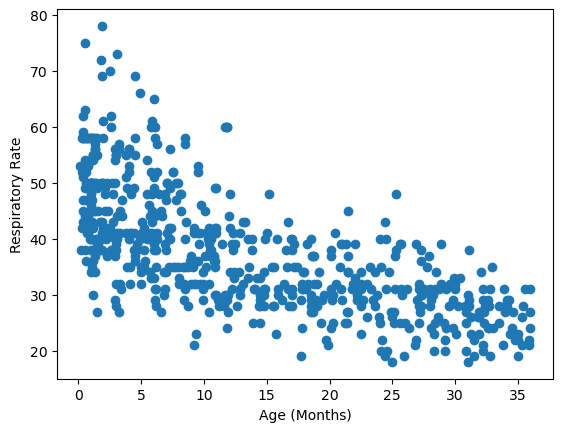

In [14]:
#5b - scatterplot of data

import matplotlib.pyplot as plt

plt.plot('Age', 'Rate', 'o', data = respiratory)
plt.xlabel('Age (Months)')
plt.ylabel('Respiratory Rate')

From the above, we see there is a negative correlation between respiratory rate and age

In [15]:
#5c

lm_md = smf.ols(formula = 'Rate ~ Age', data = respiratory).fit()
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     560.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.17e-88
Time:                        22:36:32   Log-Likelihood:                -2148.7
No. Observations:                 618   AIC:                             4301.
Df Residuals:                     616   BIC:                             4310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0522      0.504     93.317      0.000      46.062      48.042
Age           -0.6957      0.029    -23.684      0.000      -0.753      -0.638
==============================================================================
Omnibus:                       45.826   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.994
Skew:                           0.618   Prob(JB):                     1.55e-13
Kurtosis:                       3.873   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#5d

respiratory['residuals'] = respiratory['Rate'] - lm_md.fittedvalues

Text(0, 0.5, 'Residuals')

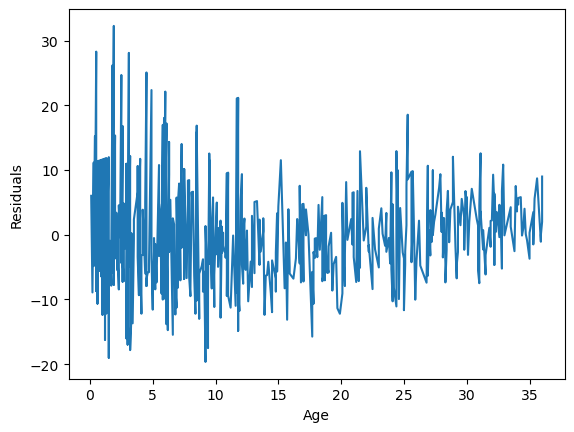

In [19]:
plt.plot('Age', 'residuals', data = respiratory)
plt.xlabel('Age')
plt.ylabel('Residuals')

Linearity assumption is met since there are patterns in the residuals plot

In [20]:
#5e

respiratory['log_Rate'] = np.log(respiratory['Rate'])

In [21]:
lm_md_log = smf.ols(formula = 'log_Rate ~ Age', data = respiratory).fit()
lm_md_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_Rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     667.6
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          2.74e-100
Time:                        22:45:53   Log-Likelihood:                 129.96
No. Observations:                 618   AIC:                            -255.9
Df Residuals:                     616   BIC:                            -247.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8451      0.013    304.500      0.000       3.820       3.870
Age           -0.0190      0.001    -25.839      0.000      -0.020      -0.018
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.242
Skew:                          -0.030   Prob(JB):                        0.886
Kurtosis:                       2.924   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#5f

#Want to find predicted respiratory rate for child who is 5 months old
obsv = pd.DataFrame({'Age': [5]})
obsv

,Age
0,5


In [23]:
np.exp(lm_md_log.predict(obsv))

0    42.524218
dtype: float64

From the above, the predicted respiratory rate for a 5 month old child is about 42.5

In [1]:
#Exercise 6

#Women = .86
#Men = 1.06

In [31]:
#Exercise 7 

#Answer: C

In [32]:
#Exercise 8 - use Default datafile

#8a read file and call it credit_default
credit_default = pd.read_csv('Default.csv')
credit_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [33]:
#8b - New variable called default_numb that takes the value of 1 when default = Yes and 0 when default = No

#Yes = 1, else it equals 0 (No)
credit_default['default_numb'] = np.where(credit_default['default'] == 'Yes', 1, 0)
credit_default.head()

,default,student,balance,income,default_numb
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [34]:
#8c - Using the statsmodels.formula.api, build a logistic regression model in which
# default_numb is the target variable, balance and income are input variables.

lg_md = smf.logit(formula = 'default_numb ~ balance + income', data = credit_default).fit()
lg_md.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default_numb   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.4594
Time:                        23:22:19   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
#8d - Predict likelihood of default of a customer with balance = $2,000 and income = $70k using part c model

obsv = pd.DataFrame({'balance': [2000], 'income': [70000]})
obsv

,balance,income
0,2000,70000


In [37]:
lg_md.predict(obsv)

0    0.770364
dtype: float64

In [38]:
#8e 

lg_md2 = smf.logit(formula = 'default_numb ~ balance + income + C(student)', data = credit_default).fit()
lg_md2.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default_numb   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:                  0.4619
Time:                        23:28:56   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.8690      0.492    -22.079      0.000     -11.834      -9.904
C(student)[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance               0.0057      0.000     24.737      0.000       0.005       0.006
income             3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
=====================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
#8f - predict likelihood of default of a customer with balance = $2500 and income = $20k and student = Yes.

obsv = pd.DataFrame({'balance': [2500], 'income': [20000], 'student': ['Yes']})
obsv

,balance,income,student
0,2500,20000,Yes


In [41]:
lg_md2.predict(obsv)

0    0.947156
dtype: float64